In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import analysis_helper
display(HTML("<style>.container { width:100% !important; }</style>")) # widest display
import matplotlib.dates as dates
import matplotlib.lines as mlines
pd.options.display.max_colwidth = 1000
pd.options.display.width = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 3

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(13, 5)


%matplotlib inline
plt.style.use('ggplot') 

In [277]:
reload(analysis_helper)
import analysis_helper

In [67]:
data_path = 'phaseone_v0.csv'
data = analysis_helper.Data(pth=data_path)

adding days to primary outcomes...
splitting into opiate/nonopiate samples...


## Explore distributions
- Relative to primary outcomes of LOS in ICU and hospital
- Relative to secondary outcomes of mortality 30d, 1yr
- Look at plots
    - histogram
    - box plot
    - qq plot
- Descriptive statistics
    - mean
    - median
    - std dev
    - variance##
- Try out some tests
    - test for normality 
    - mann whitney u test
    - CI for MU tests

## ICU Length of Stay 

In [293]:
reload(analysis_helper)
import analysis_helper

#### exploration

			*** Info for: non_opiate group ***
			--- Descriptive Stats --- 
 N=28200 MEAN=3.93856693262 MEDIAN=2.11454861111 STD.DEV=5.66600214659 VARIANCE=32.1035803251

			***Info for: opiate group ***
			--- Descriptive Stats --- 
 N=4184 MEAN=4.24934680064 MEDIAN=2.2502662037 STD.DEV=5.84239499835 VARIANCE=34.1335793168

					{HISTOGRAMS}


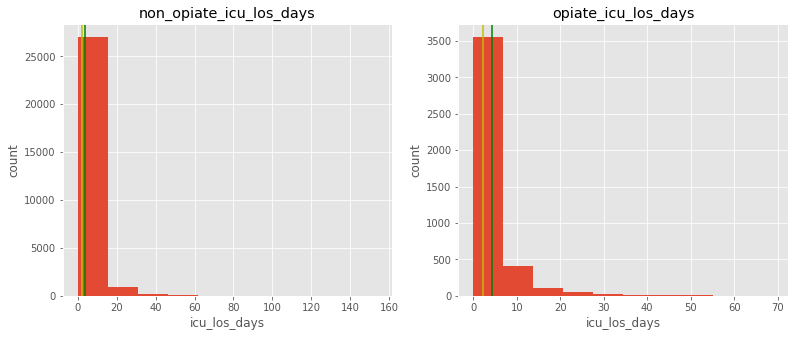

In [294]:
analysis_helper.plot_hist(data, col='icu_los_days')

#### normality testing
- QQ plots
- KS test

					{Q-Q PLOTS}


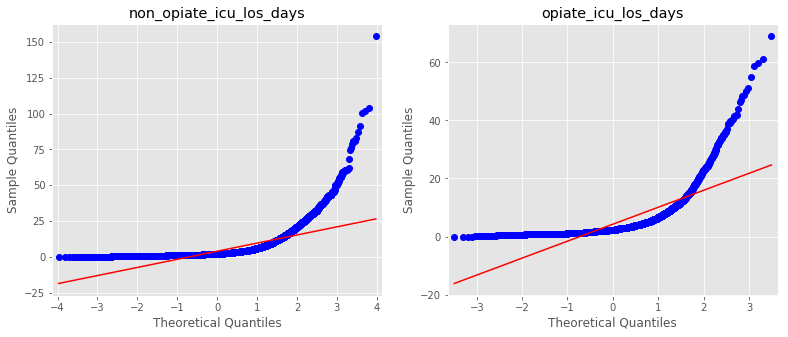


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (fail to reject H0)
Opiate samples
Pval=2.585137421238262e-231 less than alpha=0.050. Different distribution (fail to reject H0)


In [279]:
analysis_helper.plot_qq(data, col='icu_los_days')
analysis_helper.do_normality(data, col='icu_los_days')

#### statistical test
- mann whitney u test

In [280]:
analysis_helper.do_mannwhitney(data, col='icu_los_days')


			{Mann Whitney U-test Comparing icu_los_days between opiate/non-opiate use on admission}
Statistics=62025559.5, p=0.000
Pval=3.901161328054533e-08 less than alpha=0.050. Different distribution (fail to reject H0)


## Hospital Length of Stay 

#### exploration

			*** Info for: non_opiate group ***
			--- Descriptive Stats --- 
 N=28200 MEAN=9.59530319149 MEDIAN=6.81597222221 STD.DEV=9.76284463208 VARIANCE=95.3131353102

			***Info for: opiate group ***
			--- Descriptive Stats --- 
 N=4184 MEAN=11.174929958 MEDIAN=7.85069444446 STD.DEV=11.0827498814 VARIANCE=122.827344933

					{HISTOGRAMS}


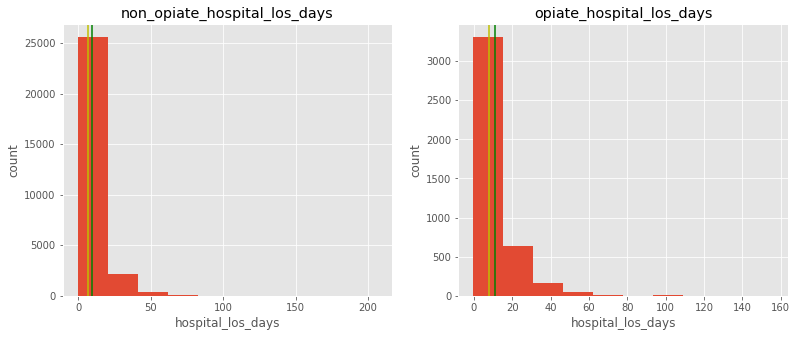

In [295]:
analysis_helper.plot_hist(data, col='hospital_los_days')

#### normality testing
- QQ plots
- KS test

					{Q-Q PLOTS}


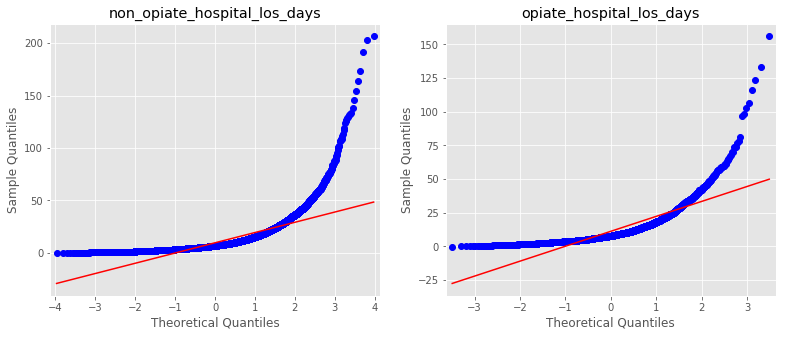


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (fail to reject H0)
Opiate samples
Pval=2.1710649517675293e-114 less than alpha=0.050. Different distribution (fail to reject H0)


In [275]:
analysis_helper.plot_qq(data, col='hospital_los_days')
analysis_helper.do_normality(data, col='hospital_los_days')

#### statistical test
- mann whitney u test

In [276]:
analysis_helper.do_mannwhitney(data, col='hospital_los_days')


			{Mann Whitney U-test Comparing hospital_los_days between opiate/non-opiate use on admission}
Statistics=64847857.0, p=0.000
Pval=1.642559665836863e-25 less than alpha=0.050. Different distribution (fail to reject H0)


### 30 day mortality

In [271]:
reload(analysis_helper)
import analysis_helper

#### exploration

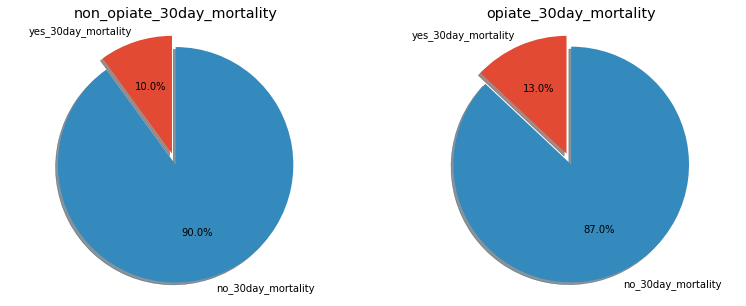

In [272]:
analysis_helper.pie_chart(data, col='30day_mortality')

#### chi square analysis

In [ ]:
#TODO

#### relative risk ratios

In [269]:
non = data.non_opiates
num_non_yes = len(non.data[non.data['1year_mortality'] == 1])
num_non_no = len(non.data[non.data['1year_mortality'] == 0])

op = data.opiate
num_op_yes = len(op.data[op.data['1year_mortality'] == 1])
num_op_no = len(op.data[op.data['1year_mortality'] == 0])

pd.DataFrame.from_items([('Non-opiate', [num_non_yes, num_non_no]), ('opiate', [num_op_yes, num_op_no])], orient='index', columns=['Yes Mortality 1 yr', 'No Mortality 1 yr'])

#TODO

/Users/anaelia/anaconda3/envs/opiate/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  if __name__ == '__main__':


,Yes Mortality 1 yr,No Mortality 1 yr
Non-opiate,5191,23009
opiate,1099,3085


### 1 year mortality

#### exploration

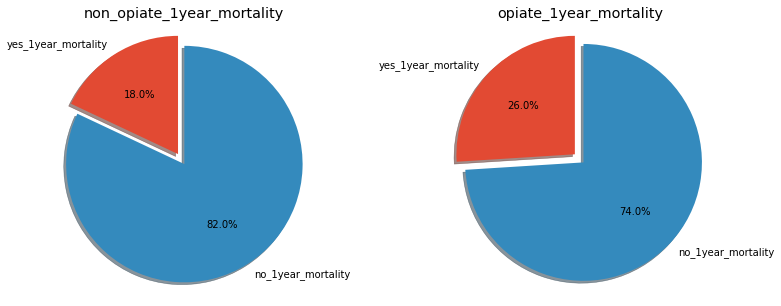

In [273]:
analysis_helper.pie_chart(data, col='1year_mortality')

#### chi square analysis

In [ ]:
#TODO

##### relative risk ratios

In [270]:
non = data.non_opiates
num_non_yes = len(non.data[non.data['1year_mortality'] == 1])
num_non_no = len(non.data[non.data['1year_mortality'] == 0])

op = data.opiate
num_op_yes = len(op.data[op.data['1year_mortality'] == 1])
num_op_no = len(op.data[op.data['1year_mortality'] == 0])

pd.DataFrame.from_items([('Non-opiate', [num_non_yes, num_non_no]), ('opiate', [num_op_yes, num_op_no])], orient='index', columns=['Yes Mortality 1 yr', 'No Mortality 1 yr'])

#TODO

/Users/anaelia/anaconda3/envs/opiate/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  if __name__ == '__main__':


,Yes Mortality 1 yr,No Mortality 1 yr
Non-opiate,5191,23009
opiate,1099,3085


In [282]:
tmp = data._Data__full_df

In [284]:
filter_method = pd.isnull(tmp.diff_last_outtime)

In [285]:
no_overlap = tmp[filter_method]

In [286]:
no_overlap

,row_id,subject_id,hadm_id,intime,outtime,age,diff_death_admit_hrs,diff_last_outtime,icd9_codes,seq_num,long_titles,valid_icu_admit,valid_age,valid_death,opiate_abuse,has_anoxic_brain,has_cancer,hist_found,opiate_history,admit_found,dis_found,group,opiates,hydromorphone,hydrocodone,oxycodone,morphine,fentanyl,tramadol,buprenorphine,methadone,oxymorphone,meperidine,icu_los_hours,hospital_intime,hospital_outtime,deathtime,hospital_expire_flag,admission_type,discharge_location,diagnosis,hospital_los_hours,gender,dod,dod_hosp,dod_ssn,death_days_since_hospital,30day_mortality,1year_mortality,admit_icd9,admit_long_titles,icu_los_days,hospital_los_days
0,2,3,145834,2101-10-20 19:10:11,2101-10-26 20:43:09,76.52,5668.830278,NaN,"['0389', '78559', '5849', '4275', '41071', '4280', '6826', '4254', '2639']","[1, 2, 3, 4, 5, 6, 7, 8, 9]","['Unspecified septicemia', 'Other shock without mention of trauma', 'Acute kidney failure, unspecified', 'Cardiac arrest', 'Subendocardial infarction, initial episode of care', 'Congestive heart failure, unspecified', 'Cellulitis and abscess of leg, except foot', 'Other primary cardiomyopathies', 'Unspecified protein-calorie malnutrition']",1,1,1,0,0,0,1,0,1,1,3,1,0,0,1,0,0,0,0,0,0,0,145.549444,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,0,EMERGENCY,SNF,HYPOTENSION,258.833333,M,2102-06-14,NaN,2102-06-14 00:00:00,225.418056,0,1,0389,Unspecified septicemia,6.064560,10.784722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32383,61532,99999,113369,2117-12-31 11:52:36,2118-01-01 14:51:27,63.98,NaN,NaN,"['75612', '7861', '4019', '25000', '4139']","[1, 2, 3, 4, 5]","['Spondylolisthesis', 'Stridor', 'Unspecified essential hypertension', 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled', 'Other and unspecified angina pectoris']",1,1,1,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,26.980833,2117-12-30 07:15:00,2118-01-04 16:30:00,NaN,0,ELECTIVE,SNF,SPONDYLOLISTHESIS/SDA,129.250000,F,NaN,NaN,NaN,NaN,0,0,75612,Spondylolisthesis,1.124201,5.385417


In [288]:
no_overlap[no_overlap['opiates'] == 1]

,row_id,subject_id,hadm_id,intime,outtime,age,diff_death_admit_hrs,diff_last_outtime,icd9_codes,seq_num,long_titles,valid_icu_admit,valid_age,valid_death,opiate_abuse,has_anoxic_brain,has_cancer,hist_found,opiate_history,admit_found,dis_found,group,opiates,hydromorphone,hydrocodone,oxycodone,morphine,fentanyl,tramadol,buprenorphine,methadone,oxymorphone,meperidine,icu_los_hours,hospital_intime,hospital_outtime,deathtime,hospital_expire_flag,admission_type,discharge_location,diagnosis,hospital_los_hours,gender,dod,dod_hosp,dod_ssn,death_days_since_hospital,30day_mortality,1year_mortality,admit_icd9,admit_long_titles,icu_los_days,hospital_los_days
0,2,3,145834,2101-10-20 19:10:11,2101-10-26 20:43:09,76.52,5668.830278,NaN,"['0389', '78559', '5849', '4275', '41071', '4280', '6826', '4254', '2639']","[1, 2, 3, 4, 5, 6, 7, 8, 9]","['Unspecified septicemia', 'Other shock without mention of trauma', 'Acute kidney failure, unspecified', 'Cardiac arrest', 'Subendocardial infarction, initial episode of care', 'Congestive heart failure, unspecified', 'Cellulitis and abscess of leg, except foot', 'Other primary cardiomyopathies', 'Unspecified protein-calorie malnutrition']",1,1,1,0,0,0,1,0,1,1,3,1,0,0,1,0,0,0,0,0,0,0,145.549444,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,0,EMERGENCY,SNF,HYPOTENSION,258.833333,M,2102-06-14,NaN,2102-06-14 00:00:00,225.418056,0,1,0389,Unspecified septicemia,6.064560,10.784722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32368,61514,99937,129380,2128-05-11 15:17:31,2128-05-12 19:39:00,65.68,8912.708056,NaN,"['486', '1120', '515', '79902', '4019', '2720', '53550', '71690', '311', 'V103']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","['Pneumonia, organism unspecified', 'Candidiasis of mouth', 'Postinflammatory pulmonary fibrosis', 'Hypoxemia', 'Unspecified essential hypertension', 'Pure hypercholesterolemia', 'Unspecified gastritis and gastroduodenitis, without mention of hemorrhage', 'Arthropathy, unspecified, site unspecified', 'Depressive disorder, not elsewhere classified', 'Personal history of malignant neoplasm of breast']",1,1,1,0,0,0,1,0,1,1,3,1,0,1,0,0,0,0,0,0,0,0,28.358056,2128-05-11 15:16:00,2128-05-20 13:35:00,NaN,0,EMERGENCY,SNF,PNEUMONIA,214.316667,F,2129-05-18,2129-05-18,NaN,362.434028,0,1,486,"Pneumonia, organism unspecified",1.181586,8.929861


In [287]:
no_overlap[no_overlap['opiates'] == 0]

,row_id,subject_id,hadm_id,intime,outtime,age,diff_death_admit_hrs,diff_last_outtime,icd9_codes,seq_num,long_titles,valid_icu_admit,valid_age,valid_death,opiate_abuse,has_anoxic_brain,has_cancer,hist_found,opiate_history,admit_found,dis_found,group,opiates,hydromorphone,hydrocodone,oxycodone,morphine,fentanyl,tramadol,buprenorphine,methadone,oxymorphone,meperidine,icu_los_hours,hospital_intime,hospital_outtime,deathtime,hospital_expire_flag,admission_type,discharge_location,diagnosis,hospital_los_hours,gender,dod,dod_hosp,dod_ssn,death_days_since_hospital,30day_mortality,1year_mortality,admit_icd9,admit_long_titles,icu_los_days,hospital_los_days
1,3,4,185777,2191-03-16 00:29:31,2191-03-17 16:46:31,47.84,NaN,NaN,"['042', '1363', '7994', '2763', '7907', '5715', '04111', 'V090', 'E9317']","[1, 2, 3, 4, 5, 6, 7, 8, 9]","['Human immunodeficiency virus [HIV] disease', 'Pneumocystosis', 'Cachexia', 'Alkalosis', 'Bacteremia', 'Cirrhosis of liver without mention of alcohol', 'Methicillin susceptible Staphylococcus aureus in conditions classified elsewhere and of unspecified site', 'Infection with microorganisms resistant to penicillins', 'Antiviral drugs causing adverse effects in therapeutic use']",1,1,1,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,40.283333,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,0,EMERGENCY,HOME WITH HOME IV PROVIDR,"FEVER,DEHYDRATION,FAILURE TO THRIVE",186.216667,F,NaN,NaN,NaN,NaN,0,0,042,Human immunodeficiency virus [HIV] disease,1.678472,7.759028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32383,61532,99999,113369,2117-12-31 11:52:36,2118-01-01 14:51:27,63.98,NaN,NaN,"['75612', '7861', '4019', '25000', '4139']","[1, 2, 3, 4, 5]","['Spondylolisthesis', 'Stridor', 'Unspecified essential hypertension', 'Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled', 'Other and unspecified angina pectoris']",1,1,1,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,26.980833,2117-12-30 07:15:00,2118-01-04 16:30:00,NaN,0,ELECTIVE,SNF,SPONDYLOLISTHESIS/SDA,129.250000,F,NaN,NaN,NaN,NaN,0,0,75612,Spondylolisthesis,1.124201,5.385417


In [ ]:
# 4184 ==> 3438
# 28200 ==> 25233

In [302]:
746.0 / 4184.0

0.1782982791586998

In [296]:
def p_change(new, old):
    diff = float(new - old)
    return (diff / old) * 100

In [300]:
4184 - 3438

746

In [297]:
p_change(3438, 4184)

-17.82982791586998

In [303]:
28200 - 25233

2967

In [299]:
p_change(25233, 28200)

-10.52127659574468